In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as lr
import json
import datetime
from flask import *
from flask import jsonify
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

# Reading Data
police_shooting_file = pd.read_csv('Fixed dataset/police_killings_mpv.csv', usecols=['charges', 'armed_status', 'state', 'victim_gender', 'victims_age', 'city', 'country', 'victims_name', 'victims_race', 'date'])
pred_by_race = pd.read_csv('Fixed dataset/police_killings_mpv.csv', usecols=['state', 'victim_gender', 'victims_age', 'victims_race', 'date'])

# Sort by Date
pred_by_race['date'] = pd.to_datetime(pred_by_race['date'], format='%d/%m/%Y')

sorted_pred_by_race = pred_by_race.sort_values('date')

sorted_pred_by_race.head()

# Sum based on month
grouped_pred_by_race = sorted_pred_by_race.groupby(pd.Grouper(key='date', freq='M')).size().reset_index(name='count')
print(grouped_pred_by_race)

         date  count
0  2013-01-31    105
1  2013-02-28     53
2  2013-03-31     98
3  2013-04-30     94
4  2013-05-31    102
..        ...    ...
87 2020-04-30    108
88 2020-05-31    121
89 2020-06-30     84
90 2020-07-31     79
91 2020-08-31     94

[92 rows x 2 columns]


Text(0, 0.5, 'Total Penembakan')

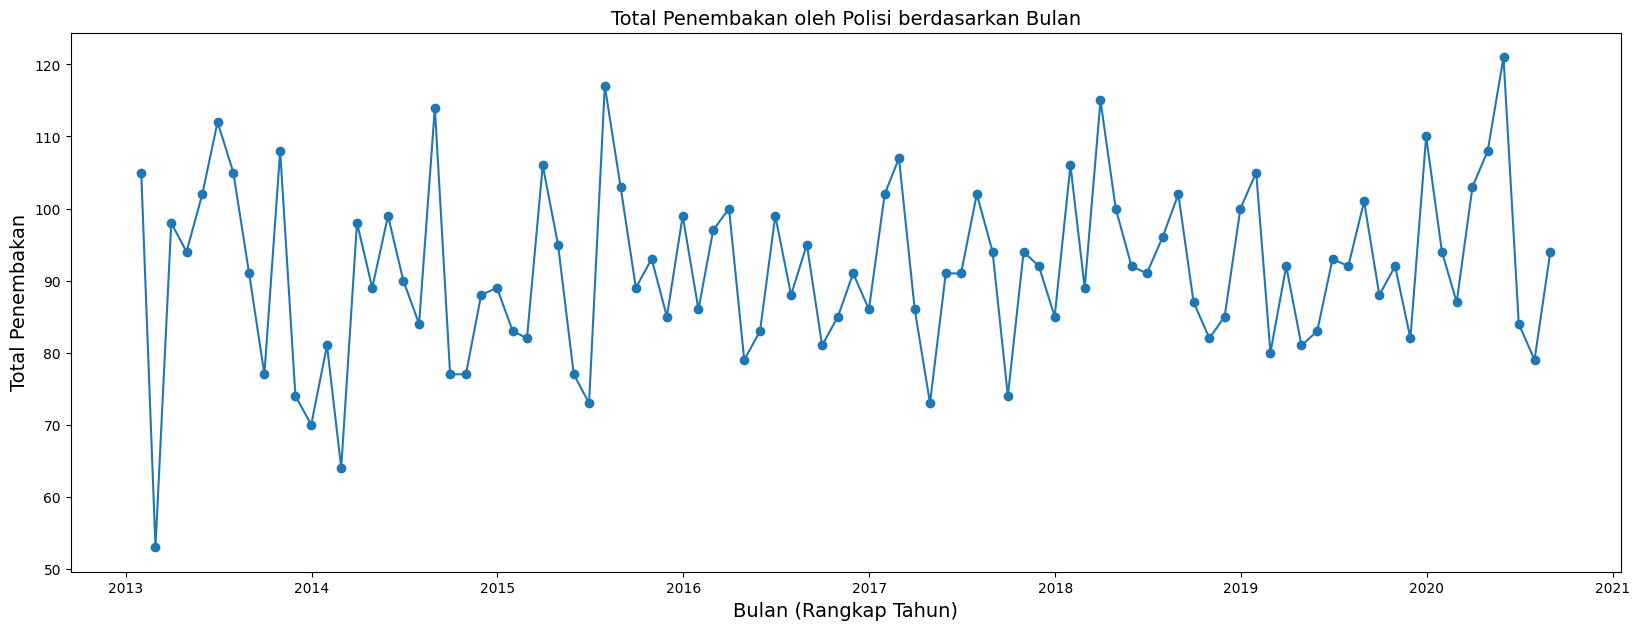

In [2]:
# Plotting by Month
date_plot = grouped_pred_by_race["date"]
count_plot = grouped_pred_by_race["count"]
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(date_plot, count_plot)
ax.plot(date_plot, count_plot)
ax.set_title("Total Penembakan oleh Polisi berdasarkan Bulan", fontsize=14)
ax.set_xlabel("Bulan (Rangkap Tahun)", fontsize=14)
ax.set_ylabel("Total Penembakan", fontsize=14)

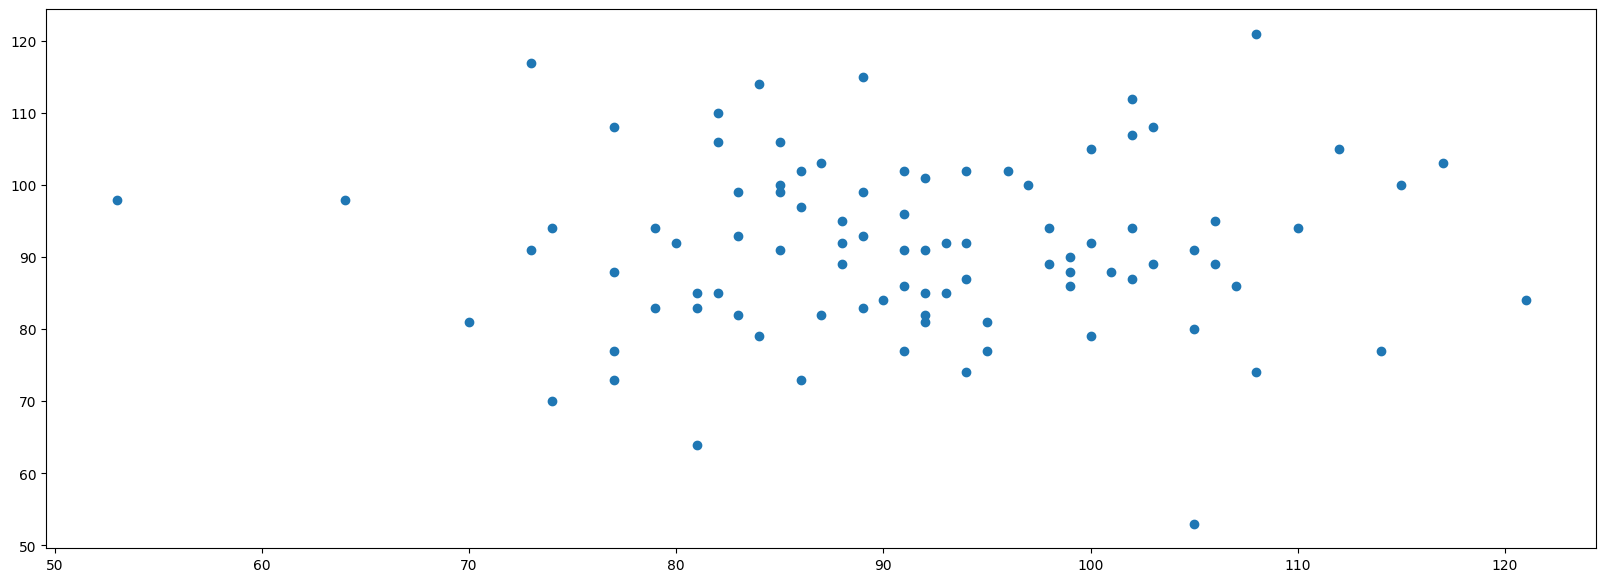

In [3]:
# Simple Linear Regression (SLR)
date = grouped_pred_by_race.iloc[:, 0].values.reshape(-1, 1)
grouped_pred_by_race['shifted_value'] = grouped_pred_by_race['count'].shift(1)
count = grouped_pred_by_race.iloc[:, 1].values

grouped_pred_by_race['shifted_value'] = grouped_pred_by_race['count'].shift(1)
X = grouped_pred_by_race.loc[:, ['shifted_value']]
X.dropna(inplace=True) 
y = grouped_pred_by_race.loc[:, "count"]
y, X = y.align(X, join='inner')
# y, X = y.align(X, join='inner')
X = X.values.reshape(-1, 1)
y = y.values
X
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(X, y)
# X = modifiedDf.loc[:, ['shifted_value']]
# slr = lr.LinearRegression()
# slrModelFitting = slr.fit(X, y)

In [13]:

X = grouped_pred_by_race['Time'] = np.arange(len(grouped_pred_by_race.index))
y = grouped_pred_by_race.loc[:, "count"]
testX = X.reshape(-1, 1)
testY = y.values
grouped_pred_by_race
slr = lr.LinearRegression()
slrModelFitting = slr.fit(testX, testY)

In [15]:
y_pred = slrModelFitting.score(testX, testY)
print(y_pred)

0.45384079023647333


[88.68513324 88.74652066 88.80790808 88.8692955  88.93068292 88.99207034
 89.05345776 89.11484518 89.1762326  89.23762002 89.29900744 89.36039486
 89.42178229 89.48316971 89.54455713 89.60594455 89.66733197 89.72871939
 89.79010681 89.85149423 89.91288165 89.97426907 90.03565649 90.09704391
 90.15843133 90.21981875 90.28120617 90.34259359 90.40398101 90.46536843
 90.52675585 90.58814327 90.64953069 90.71091811 90.77230553 90.83369296
 90.89508038 90.9564678  91.01785522 91.07924264 91.14063006 91.20201748
 91.2634049  91.32479232 91.38617974 91.44756716 91.50895458 91.570342
 91.63172942 91.69311684 91.75450426 91.81589168 91.8772791  91.93866652
 92.00005394 92.06144136 92.12282878 92.1842162  92.24560362 92.30699105
 92.36837847 92.42976589 92.49115331 92.55254073 92.61392815 92.67531557
 92.73670299 92.79809041 92.85947783 92.92086525 92.98225267 93.04364009
 93.10502751 93.16641493 93.22780235 93.28918977 93.35057719 93.41196461
 93.47335203 93.53473945 93.59612687 93.65751429 93.7

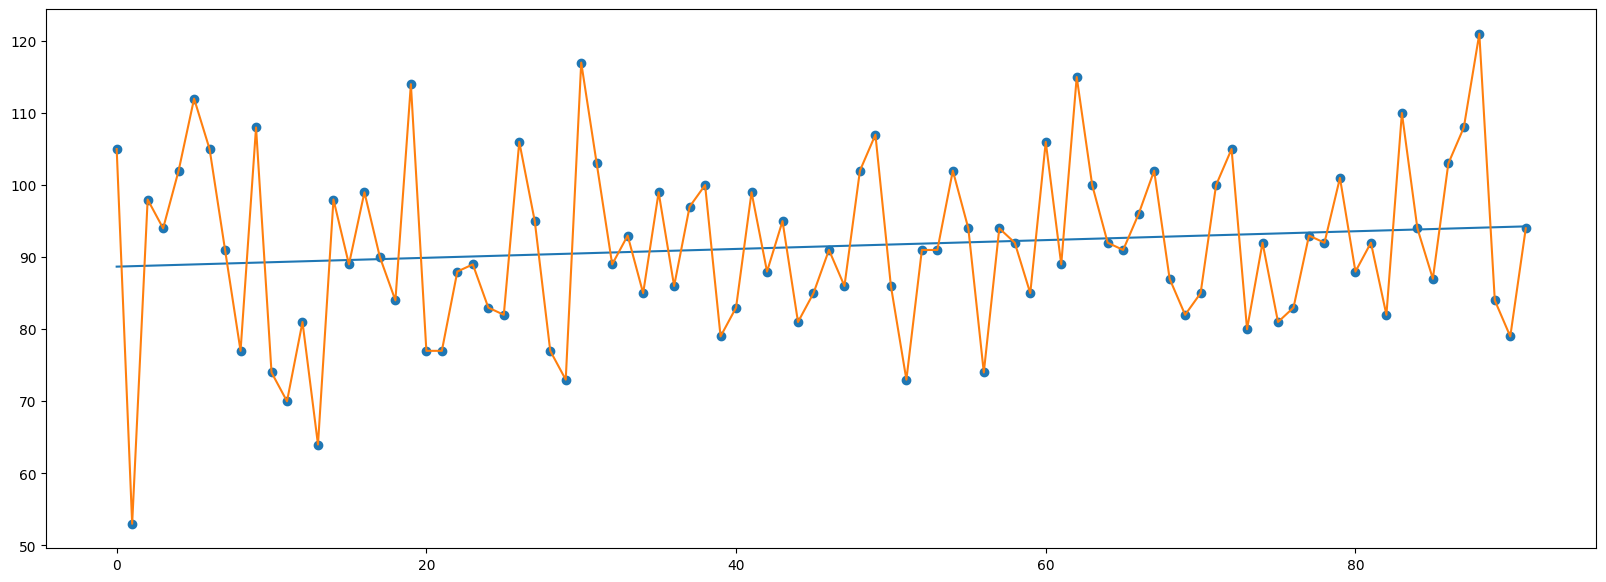

In [6]:
# ax.scatter(test, y)
slrModelFitting.score(test, y)
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(X, y_pred)
ax.scatter(X, y)
ax.plot(X, y)
print(y_pred)
print(y)

In [7]:
year_start = 2013
year_end = 2020
month_indices = X.tolist()

listOfMonth = []

for month_index in month_indices:
    year = year_start + (month_index - 1) // 12  # calculate the year based on the month index
    month_num = month_index % 12  # calculate the month number (1-12) based on the month index
    if month_num == 0:  # adjust December
        month_num = 12
    
    # create a datetime object for the first day of the month
    date = datetime.datetime(year=year, month=month_num, day=1)

    # format the date to get the month name in "mm yy" format
    month_name = date.strftime("%m %Y")
    listOfMonth.append(month_name)
data = {"date": listOfMonth, "pred": y_pred.tolist(), "x":y.tolist()}
jsonEncode = json.dumps(data)
print(jsonEncode)
with open('data.json', 'w') as f:
    json.dump(data, f)

{"date": ["12 2012", "01 2013", "02 2013", "03 2013", "04 2013", "05 2013", "06 2013", "07 2013", "08 2013", "09 2013", "10 2013", "11 2013", "12 2013", "01 2014", "02 2014", "03 2014", "04 2014", "05 2014", "06 2014", "07 2014", "08 2014", "09 2014", "10 2014", "11 2014", "12 2014", "01 2015", "02 2015", "03 2015", "04 2015", "05 2015", "06 2015", "07 2015", "08 2015", "09 2015", "10 2015", "11 2015", "12 2015", "01 2016", "02 2016", "03 2016", "04 2016", "05 2016", "06 2016", "07 2016", "08 2016", "09 2016", "10 2016", "11 2016", "12 2016", "01 2017", "02 2017", "03 2017", "04 2017", "05 2017", "06 2017", "07 2017", "08 2017", "09 2017", "10 2017", "11 2017", "12 2017", "01 2018", "02 2018", "03 2018", "04 2018", "05 2018", "06 2018", "07 2018", "08 2018", "09 2018", "10 2018", "11 2018", "12 2018", "01 2019", "02 2019", "03 2019", "04 2019", "05 2019", "06 2019", "07 2019", "08 2019", "09 2019", "10 2019", "11 2019", "12 2019", "01 2020", "02 2020", "03 2020", "04 2020", "05 2020", 

In [8]:
# @app.route('/getJson/', methods=['GET'])
# def getJsonEndcode():
#     response = jsonify(data)
#     response.headers.add('Access-Control-Allow-Origin', '*')
#     return response

# if __name__ == '__main__':
#     app.run(port=3000) 